<a href="https://colab.research.google.com/github/tanoManzo/mimic_attitude/blob/dev/ModelGraphs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Import**

In [ ]:
import pandas as pd
import numpy as np

# import data
df_log_roberta = pd.read_json('/content/drive/MyDrive/NIH/Data/annotated_burnout/log_roberta.json', orient='records')
df_log_distilbert = pd.read_json('/content/drive/MyDrive/NIH/Data/annotated_burnout/log_distilbert.json', orient='records')
df_log_MiniLM = pd.read_json('/content/drive/MyDrive/NIH/Data/annotated_burnout/log_MiniLM.json', orient='records')
df_log_bloom = pd.read_json('/content/drive/MyDrive/NIH/Data/annotated_burnout/log_bloom.json', orient='records')

print(df_log_roberta.shape)
#print(df_log_roberta.columns)


(202, 17)


# **Data Format**

In [ ]:
# data is in a list instead of raw form
def remove_lists(df):
  for col in df.columns:
    for index, row in df.iterrows():
      if isinstance(row[col], list):
        if len(row[col]) == 1:
          df.at[index, col] = row[col][0]
        elif len(row[col]) == 0:
          df.at[index,col] = np.nan
        elif len(row[col]) > 1:
          df.at[index, col] = row[col][0]
  return df

def fix_data(df):
  df['epoch'] = df['epoch'].astype(int) # convert epoch to int

  # merge data which has epoch/step seperated into two rows
  df = df.fillna('').groupby(['epoch', 'step']).agg(lambda x: [val for val in x if val != '']).reset_index()

  # data is in a list of size 2, 1 or 0. remove list or become nan
  df = remove_lists(df)

  return df

df_log_roberta = fix_data(df_log_roberta)
df_log_distilbert = fix_data(df_log_distilbert)
df_log_MiniLM = fix_data(df_log_MiniLM)
df_log_bloom = fix_data(df_log_bloom)

#print(df_log_distilbert.shape)
print(df_log_distilbert.shape)
print(df_log_distilbert.head(5).to_string(index=False))
print(df_log_distilbert.tail(1).to_string(index=False))
print(df_log_distilbert.columns)

(100, 17)
 epoch  step    loss learning_rate eval_loss eval_f1_weighted eval_f1_macro eval_f1_micro eval_accuracy eval_runtime eval_samples_per_second eval_steps_per_second train_runtime train_samples_per_second train_steps_per_second total_flos train_loss
     1     5  0.2616       0.00002  0.678512         0.793606      0.595405           0.8           0.8       0.8955                  50.251                 2.233           NaN                      NaN                    NaN        NaN        NaN
     2    10  0.2331       0.00002  0.664172         0.788664      0.619932      0.777778      0.777778       0.8843                  50.887                 2.262           NaN                      NaN                    NaN        NaN        NaN
     3    15  0.2185      0.000019  0.618387         0.848593          0.72      0.844444      0.844444       0.8935                  50.362                 2.238           NaN                      NaN                    NaN        NaN        NaN
  

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

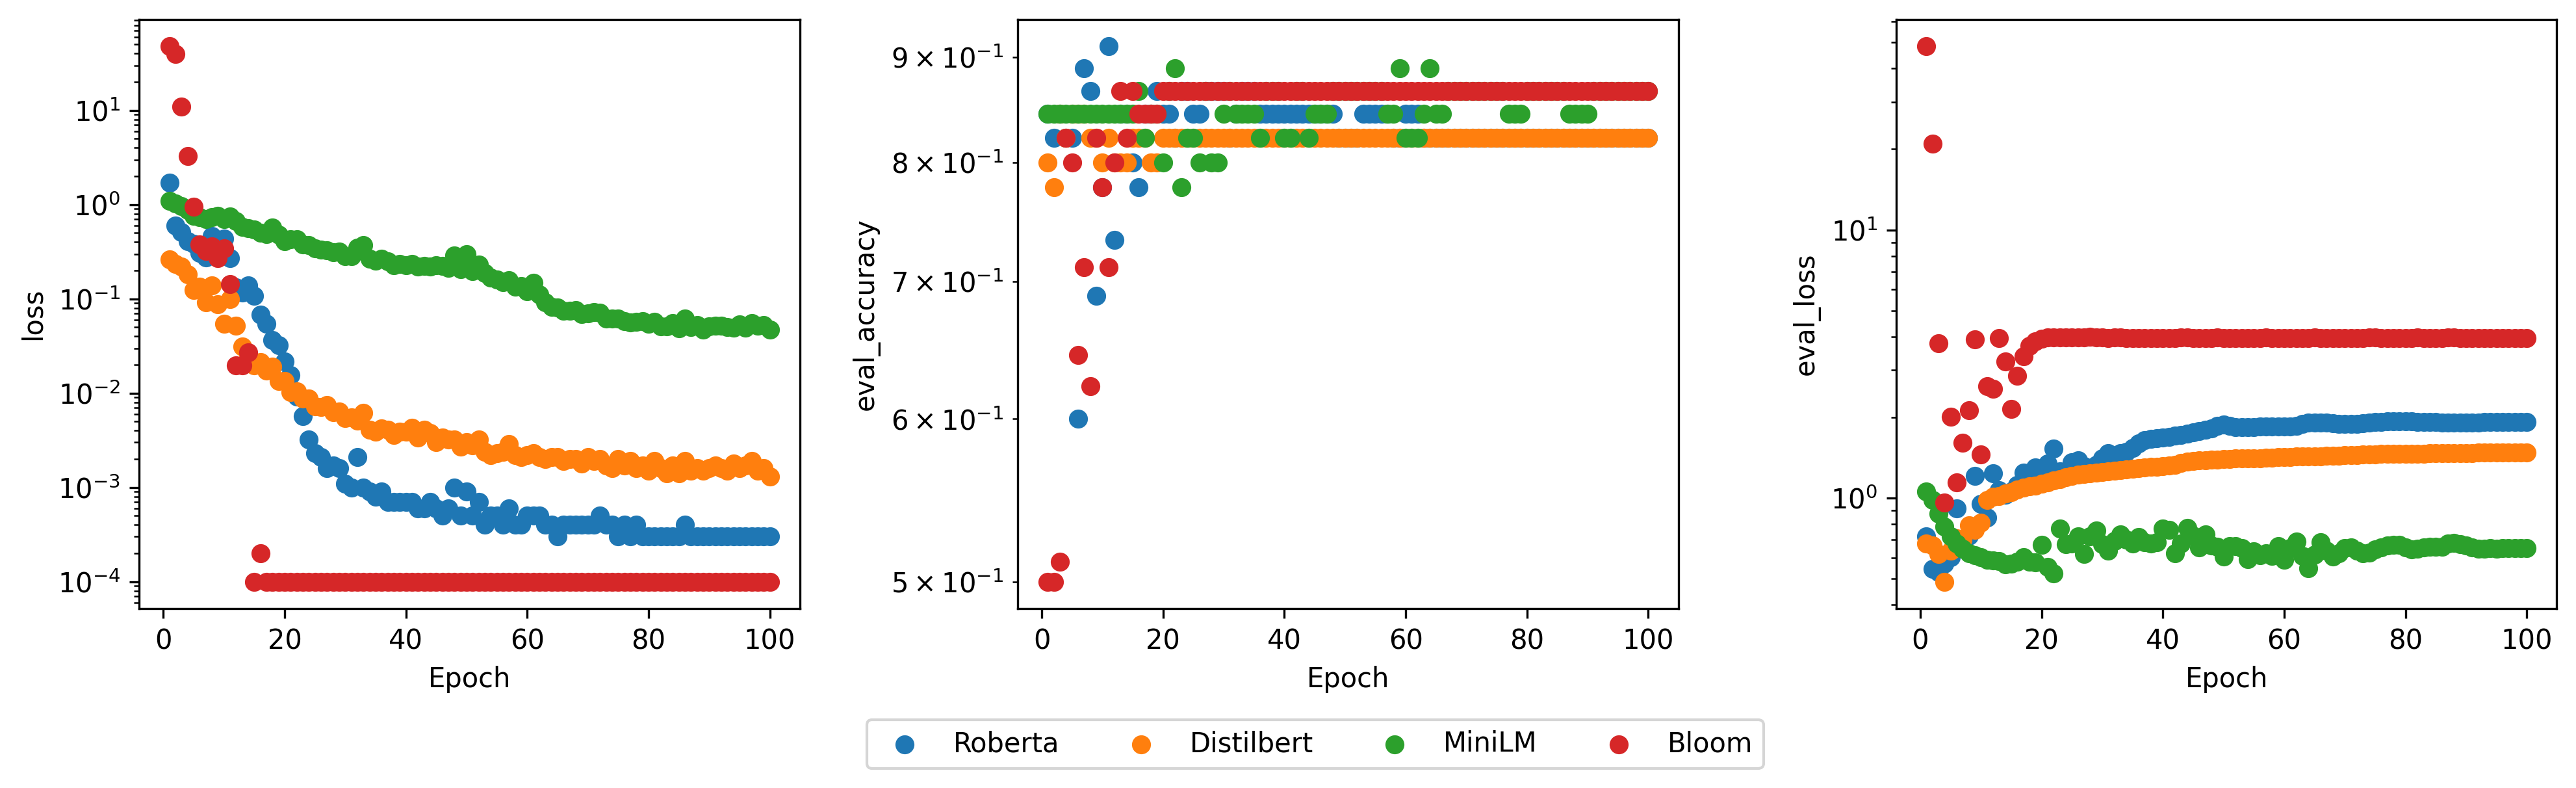

In [ ]:
# merged scatter plots
names = ['Roberta', 'Distilbert', 'MiniLM', 'Bloom']
y_values = ['loss', 'eval_accuracy', 'eval_loss']
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(16,4), dpi=300)

for i, y_val in enumerate(y_values):
  roberta = df_log_roberta[['epoch', y_val]].rename(columns={y_val: 'Roberta'})
  distilbert = df_log_distilbert[['epoch', y_val]].rename(columns={y_val: 'Distilbert'})
  MiniLM = df_log_MiniLM[['epoch', y_val]].rename(columns={y_val: 'MiniLM'})
  if y_val == 'loss':
    bloom = df_log_bloom[['epoch', y_val]].replace(0, 0.0001).rename(columns={y_val: 'Bloom'})
  else:    
    bloom = df_log_bloom[['epoch', y_val]].replace(0, 0.2).replace(0.2, 0.5).rename(columns={y_val: 'Bloom'})
  merged_loss_df = roberta.merge(distilbert, on=['epoch']).merge(MiniLM, on=['epoch']).merge(bloom, on=['epoch'])

  col = y_val
  for name in names:
    scatter = axs[i].scatter(merged_loss_df['epoch'], merged_loss_df[name], label=name)

  axs[i].set_ylabel(col)
  axs[i].set_xlabel('Epoch')
  axs[i].set_yscale('log')

  # regular scale
  #axs[i].set_yticks([0, 0.25, 0.50, 1])
  #plt.ylim(bottom=0, top=1)
  #ax.set_title(f'Model {y_val}') 

handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', bbox_to_anchor=(0.65, 0), ncol=4)
fig.subplots_adjust(wspace=0.33)
plt.show()



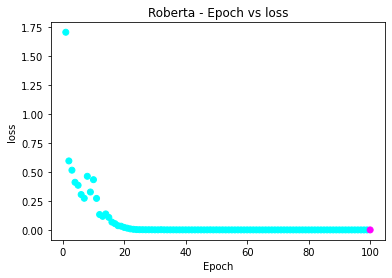

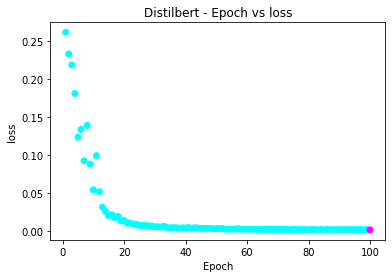

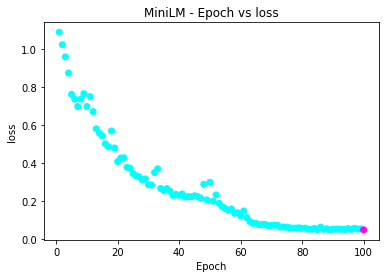

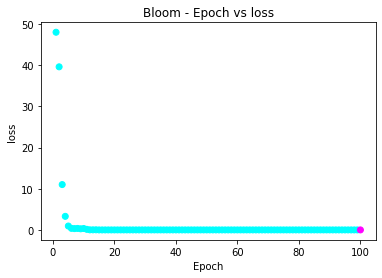

In [ ]:
# loss scatter plots
dfs = [df_log_roberta,df_log_distilbert,df_log_MiniLM,df_log_bloom]
df_names = ['Roberta', 'Distilbert', 'MiniLM', 'Bloom']
for df, name in zip(dfs, df_names):
  col = 'loss'
  fig, ax = plt.subplots()
  scatter = ax.scatter(df['epoch'], df[col], 
                      c=df.mean(axis=1), cmap='cool')
  ax.set_ylabel(col)
  ax.set_xlabel('Epoch')
  ax.set_title(f'{name} - Epoch vs {col}') 
  plt.show()

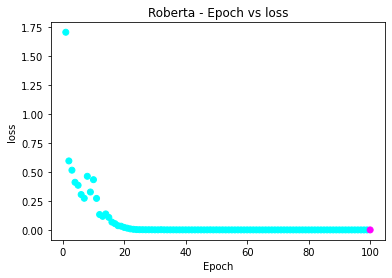

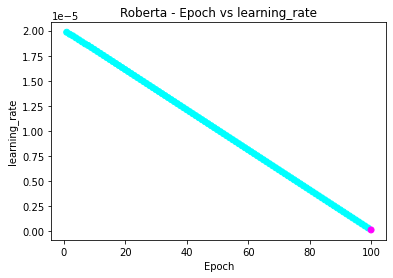

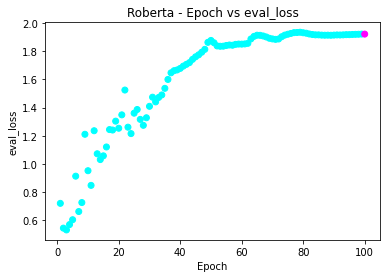

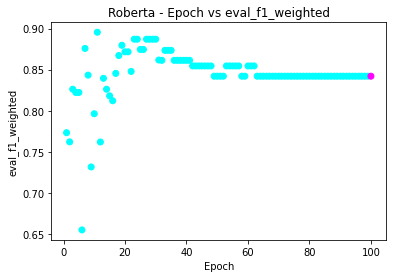

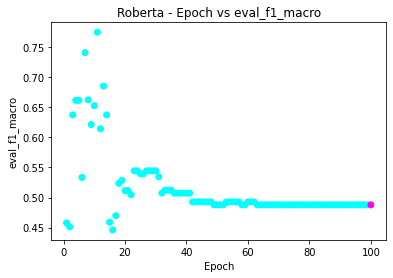

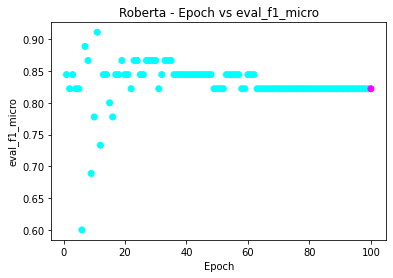

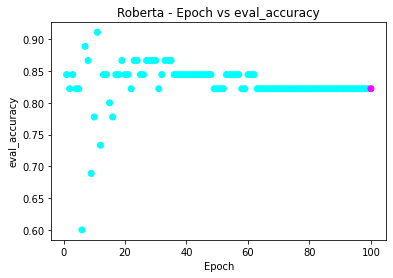

In [ ]:
# scatter plots
for col in df_log_roberta.columns[2:9]:
  fig, ax = plt.subplots()
  scatter = ax.scatter(df_log_roberta['epoch'], df_log_roberta[col], 
                      c=df_log_roberta.mean(axis=1), cmap='cool')
  ax.set_ylabel(col)
  ax.set_xlabel('Epoch')
  ax.set_title(f'Roberta - Epoch vs {col}') 
  plt.show()

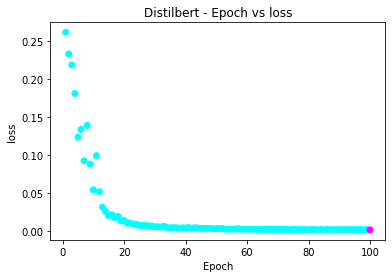

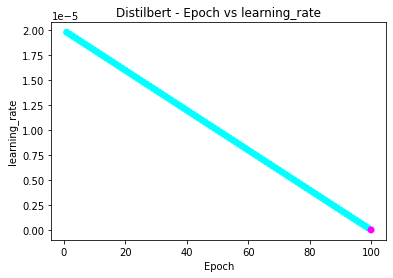

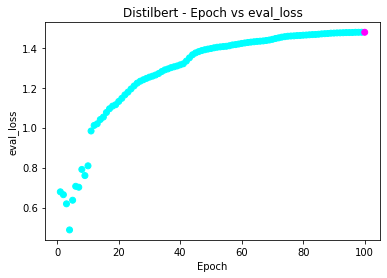

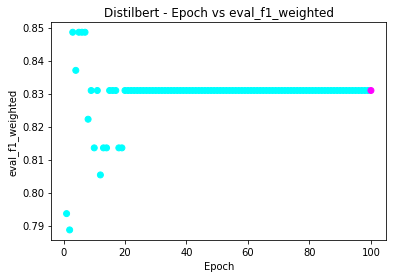

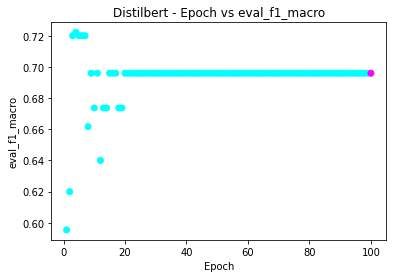

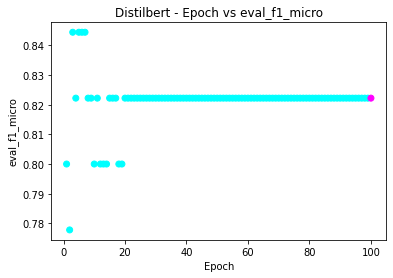

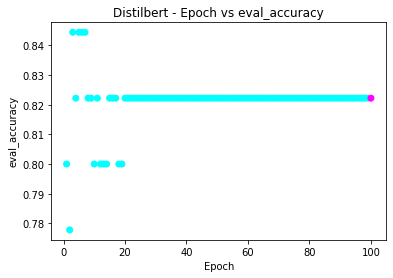

In [ ]:
# scatter plots
for col in df_log_distilbert.columns[2:9]:
  fig, ax = plt.subplots()
  scatter = ax.scatter(df_log_distilbert['epoch'], df_log_distilbert[col], 
                      c=df_log_distilbert.mean(axis=1), cmap='cool')
  ax.set_ylabel(col)
  ax.set_xlabel('Epoch')
  ax.set_title(f'Distilbert - Epoch vs {col}') 
  plt.show()

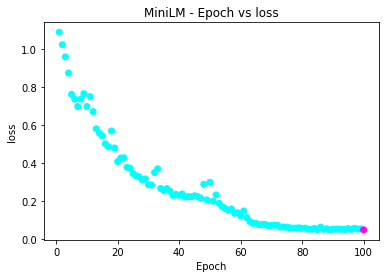

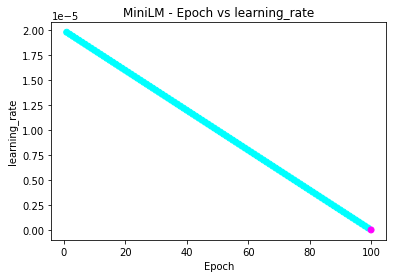

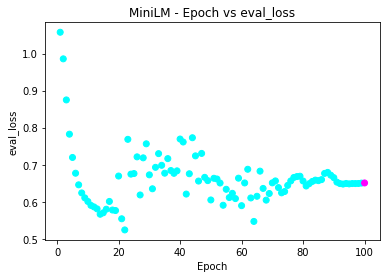

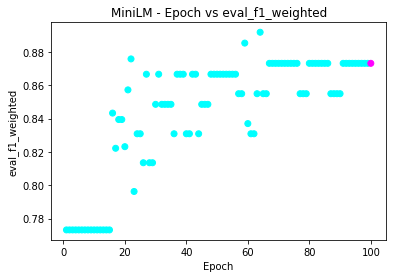

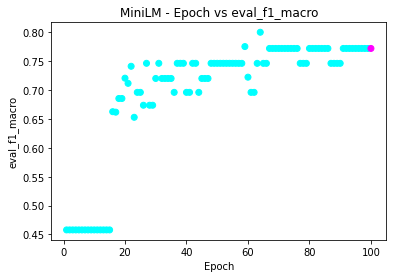

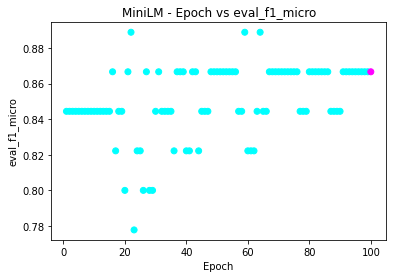

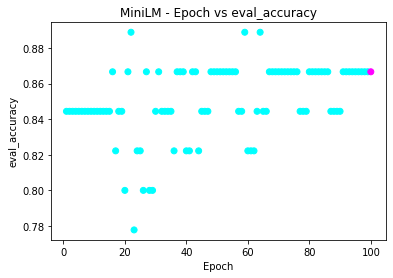

In [ ]:
# scatter plots
for col in df_log_MiniLM.columns[2:9]:
  fig, ax = plt.subplots()
  scatter = ax.scatter(df_log_MiniLM['epoch'], df_log_MiniLM[col], 
                      c=df_log_MiniLM.mean(axis=1), cmap='cool')
  ax.set_ylabel(col)
  ax.set_xlabel('Epoch')
  ax.set_title(f'MiniLM - Epoch vs {col}') 
  plt.show()

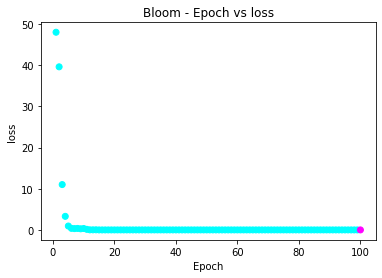

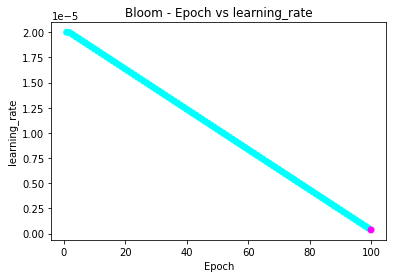

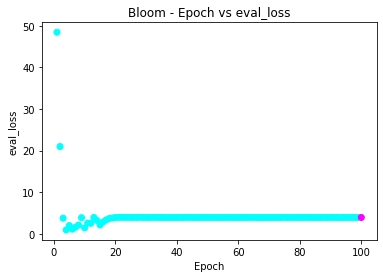

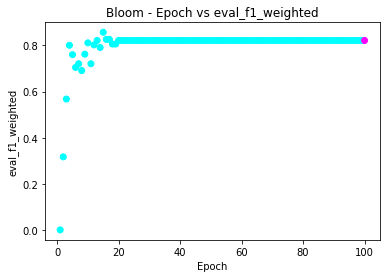

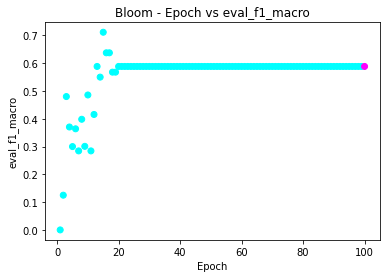

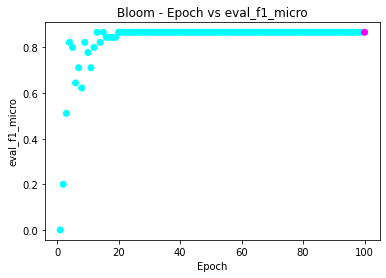

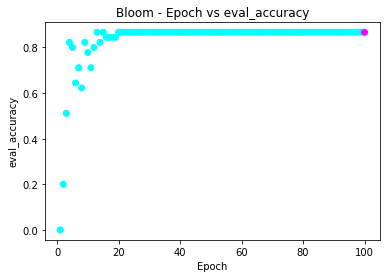

In [ ]:
# scatter plots
for col in df_log_bloom.columns[2:9]:
  fig, ax = plt.subplots()
  scatter = ax.scatter(df_log_bloom['epoch'], df_log_bloom[col], 
                      c=df_log_bloom.mean(axis=1), cmap='cool')
  ax.set_ylabel(col)
  ax.set_xlabel('Epoch')
  ax.set_title(f'Bloom - Epoch vs {col}') 
  plt.show()

# **Saved Code**

In [ ]:
#key_epoch_df = pd.DataFrame({'epoch': [d['epoch'] for d in df_log_roberta]})
#key_epoch_df = pd.DataFrame({'epoch': [d.get('epoch') for d in df_log_roberta]})
#key_epoch_df = pd.DataFrame({'epoch': [d for d in df_log_roberta]})  # this works

#print(key_epoch_df.shape)
#print(key_epoch_df.head(5).to_string(index=False))
#print(key_epoch_df.columns)



In [ ]:
# this code worked

#for d in df_log_roberta:
  #if 'epoch' not in d:
    #print(d)

#epoch_dict_list = []
#for epoch, group_df in df_log_roberta.groupby('epoch'):
#  epoch_dict = group_df.to_dict('records')[0]
#  epoch_dict['epoch'] = epoch
#  epoch_dict_list.append(epoch_dict)

#print(epoch_dict)
#print(epoch_dict_list)